### Inferential Statistics
Overview

This unit teaches the basics of statistical inference, hypothesis testing, regression and correlation and their applications such as in A/B testing. Descriptive statistics are useful for discovering and communicating insights from data. Inferential statistics are useful for drawing conclusions and predicting outcomes. In this course, the focus is on inferential statistics. For students unfamiliar or rusty with the basics of probability and descriptive statistics, Khan Academy’s probability track is a good refresher. 
Learning Objectives

    Understand the fundamentals of statistical inference and hypothesis testing
    Perform hypothesis testing for numeric and categorical data to identify statistical significance
    Understand how hypothesis testing is applied in real-world applications such as A/B testing

Prior Learning Recap

    Be familiar with basic probability and descriptive statistics
    For a refresher use Khan Academy’s Probability track
    Keep your Capstone project 1 cleaned and wrangled data ready for use in this unit

Key Terms & Concepts

    Hypothesis: An assumption made about the world that can be tested using the data
    Statistical Inference: A branch of statistics dedicated to drawing conclusions about the world using smaller data samples.
    Confidence Intervals: An interval estimate used to express the degree of uncertainty associated with a sample statistic. 
    Statistical Significance: An estimate of how likely an event might occur randomly - the smaller the number, the more likely that the observed event has some kind of real-world importance.

Submissions for this unit

    Exploratory Data Analysis Project
    Short report on Applying inferential statistics methods to your Capstone Project 1 data


### For this project, I will compare the mean note durations between Bach Chorales and Various Classical and Romantic String Quartet compositions to test if there is statistically significant evidence.

### Read in Bach data for the first time, replace the path to what ever you prefer

Code below gathers the data, skip to data cell if data is already in directory. First we will iterate through the string quartet midi files to analzye the compositions.

In [1]:
# Import the appropriate packages
from music21 import *
from collections import Counter
import pandas as pd
import os


def iterateMusic('path'):
    # Instantiate the Keys list
    Keys = []
    # Instantiate the Time Signature list
    TimeSign = []
    # Instantiate the Note duration list
    NoteDuration = []
    # Instantiate the Note Pitches list
    NotePitches = []
    # Instantiate the Note String Pitches list
    NoteStrPitches = []
    # Instantiate the Note Frequency list
    NoteFreq = []
    # Instantiate the Note and Duration list
    NoteAndDuration= []
    # Create a path object to read the data from
    #path = 'xxxx' 

    # Iterate through the directory and read the files
    for filename in os.listdir(path):
        # parse the file into a music21 stream object called midi
        midi = converter.parse(path + filename)
        # use the music21 analyze call to find the key and store in the key object
        key = midi.analyze('key')
        # append the key value for a midi object into the Keys list
        Keys.append(key)
        # use the recurse and get elements by class calls to extract the time signature
        # the position argument grabs the time signature from the soprano voice, or the highest voice
        time = midi.recurse().getElementsByClass(meter.TimeSignature)[0]
        # Append the time object to the TimeSign list
        TimeSign.append(time)
    
        # Iterate through each note in the midi object
        for n in midi.flat.notes:
            # make sure we are not appending chord values
            if not ("chord") in str(n):
                # Append the NoteDuration with the beatStrength value
                NoteDuration.append(n.beatStrength)
                # Append the NoteDuration with the midi.flat.notes value
                NotePitches.append(n)
                # Append the NoteDuration with the string version of the midi.flat.notes value
                NoteStrPitches.append(str(n))
                # Append the NoteDuration with the NoteFreq value with the ps value
                NoteFreq.append(n.ps)
                # append the NoteAndDuration list with the string versions of the flat notes and duration
                NoteAndDuration.append([str(n), str(n.beatStrength)])
            # else skip the note record
            else:
                pass
    return Keys, TimeSign, NoteDuration, NotePitches, NoteFreq, NoteAndDuration

C:\Users\qh1444dd\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:31: Music21DeprecationWarning: Note._getPs was deprecated on May 2014 and will disappear at or after May 2016. use pitch.ps instead


In [ ]:
Then use the function to iterate through the string quartet files

In [ ]:
iterateMusic('<string quartets path>')

Next, create a pitchData dataframe using pandas

In [2]:
# create a pitch data frame from the NoteDuration, NotePitches, NoteFreq, and NoteAndDuration lists
PitchData = pd.DataFrame({'NoteDuration': NoteDuration,
                          'NotePitches': NotePitches,
                          'NoteFreq': NoteFreq,
                          'NoteAndDuration': NoteAndDuration})

In [3]:
# join the note and durations values into a single value
PitchData['str_NoteAndDuration'] = PitchData.NoteAndDuration.apply(', '.join)

In [4]:
# create a csv version of the Pitch data for the string quartets
PitchData.to_csv('PitchDataSQ.csv')

Now, use the iterateMusic() function to iterate throught the Bach files

In [ ]:
iterateMusic('<Bach chorales path>')

In [1]:
# create a pitch data frame from the NoteDuration, NotePitches, NoteFreq, and NoteAndDuration lists
PitchData = pd.DataFrame({'NoteDuration': NoteDuration,
                          'NotePitches': NotePitches,
                          'NoteFreq': NoteFreq,
                          'NoteAndDuration': NoteAndDuration})
PitchData = pd.read_csv('PitchDataBach.csv')

In [2]:
# Examine the top results from the PitchData data frame
PitchData.head()

,Unnamed: 0,NoteAndDuration,NoteDuration,NoteFreq,NotePitches,str_NoteAndDuration
0,0,"['<music21.note.Note F>', '0.25']",0.25,65.0,<music21.note.Note F>,"<music21.note.Note F>, 0.25"
1,1,"['<music21.note.Note F>', '0.25']",0.25,65.0,<music21.note.Note F>,"<music21.note.Note F>, 0.25"
2,2,"['<music21.note.Note C>', '0.25']",0.25,60.0,<music21.note.Note C>,"<music21.note.Note C>, 0.25"
3,3,"['<music21.note.Note A>', '0.25']",0.25,57.0,<music21.note.Note A>,"<music21.note.Note A>, 0.25"
4,4,"['<music21.note.Note F>', '0.25']",0.25,53.0,<music21.note.Note F>,"<music21.note.Note F>, 0.25"


Next we will want to compare the the volume of notes between the Bach chorales and the string quartets.

In [11]:
#find the length of both datasets

# Length of the string quartets
StringsLen = len(StringsPD)
# Length of the Bach Chorales
BachLen = len(BachPD)
# Calculate the percentage increase
PercentInc = round((len(StringsPD) -len(BachPD)  )/len(BachPD) * 100, 2)
print('There are %s notes from the new string quartets and' 
      '\n%s notes from the original Bach corpus' 
      'and a %s percent increase to the number of notes in the training corpus!'% (StringsLen, BachLen, PercentInc ))  

There are 1048575 notes from the new string quartets and
126279 notes from the original Bach corpusand a 730.36 percent increase to the number of notes in the training corpus!


### Compare the means of the 2 groups

In the previous example, we compared the total number of notes between the two groups. Next we will count the number of times a given note is represented in each corpus and compare. First we will need to aggregate both data sets.

In [12]:
## String Quartets

# aggregate the Strings dataframe by the note duration and frequency and ount the NoteDurations
StringsPD = StringsPD.groupby(['NoteDuration', 'NoteFreq'])['str_NoteAndDuration'].count()
# Reset the index for the strings df
StringsPD = StringsPD.reset_index()
# Rename the columns for the strings data frame
StringsPD.columns = ['NoteDuration', 'NoteFreq', 'Count']
# Cast the Count as an integer
StringsPD.Count = StringsPD.Count.astype(int)

In [13]:
# aggregate the chorales dataframe by the note duration and frequency and ount the NoteDurations
BachPD = BachPD.groupby(['NoteDuration', 'NoteFreq'])['str_NoteAndDuration'].count()
# Reset the index for the strings df
BachPD = BachPD.reset_index()
# Rename the columns for the strings data frame
BachPD.columns = ['NoteDuration', 'NoteFreq', 'Count']
# Cast the Count as an integer
BachPD.Count = BachPD.Count.astype(int)

Now that the counts of notes have been aggregated, let's visualize the data.

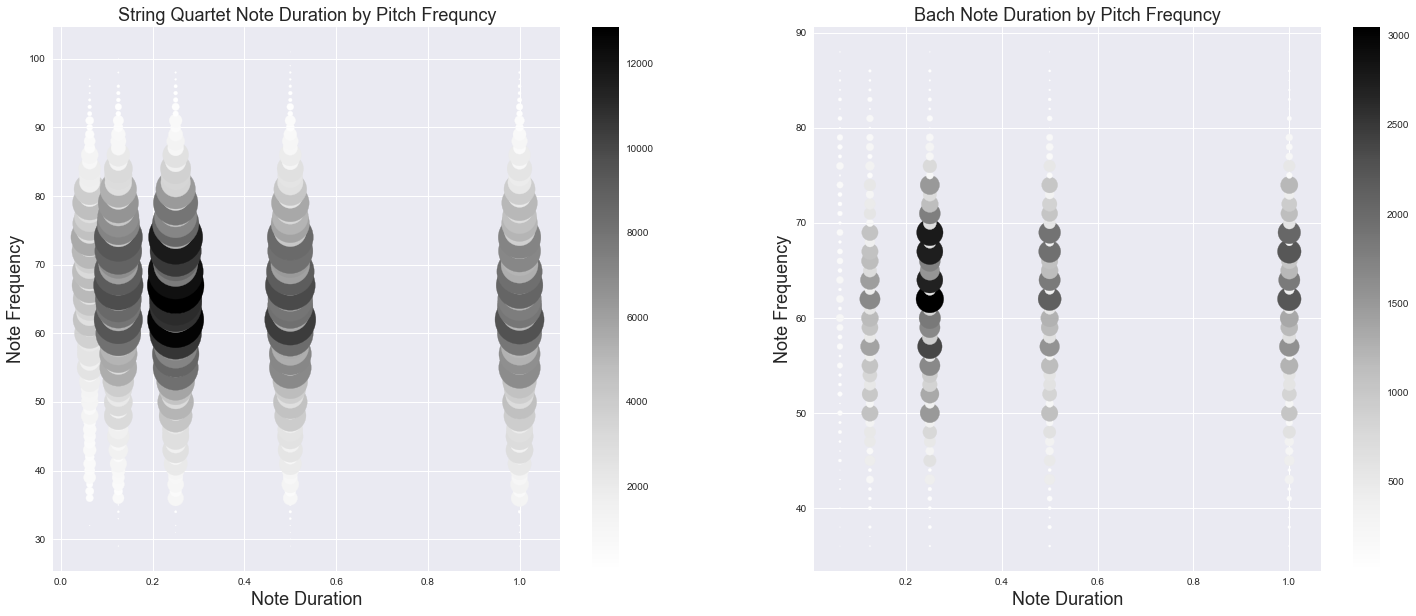

In [17]:
# import the appropriate packages and utilize inline magic matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## String quartet plot

# increase the size of the output
plt.rcParams['figure.figsize'] = (25.0, 10.0)

# setup 2 plots, this indicates 2 plots in a row and select the left cell
plt.subplot(1, 2, 1)

# Create the String Quartet scatter plot
points = plt.scatter(StringsPD['NoteDuration']
            , StringsPD['NoteFreq']
            , c = StringsPD['Count']
            , s = (StringsPD['Count']/4))

# Set the colorbar
plt.colorbar(points)
# Set the title, increase the font so it is readable
plt.title("String Quartet Note Duration by Pitch Frequncy", fontsize=18)
# Set the x label, increase the font so it is readable
plt.xlabel('Note Duration', fontsize=18)
# Set the y label, increase the font so it is readable
plt.ylabel('Note Frequency', fontsize=18)

## Chorale plot

# setup 2 plots, this indicates 2 plots in a row and select the right cell
plt.subplot(1, 2, 2)

# Create the String Quartet scatter plot
points = plt.scatter(BachPD['NoteDuration']
            , BachPD['NoteFreq']
            , c = BachPD['Count']
            , s = (BachPD['Count']/4))
# Set the colorbar
plt.colorbar(points)
# Set the title, increase the font so it is readable
plt.title("Bach Note Duration by Pitch Frequncy", fontsize=18)
# Set the x label, increase the font so it is readable
plt.xlabel('Note Duration', fontsize=18)
# Set the y label, increase the font so it is readable
plt.ylabel('Note Frequency', fontsize=18)

# Save the plot
plt.savefig('FreqDurationCompare.png', dpi=100)

Judging by the plot, it appears that the String quartets have a higher proportion of faster note durations. However, it is not clear if there is evidence of a statistical diffrence between the 2 groups. Next I will conduct a z test for the proportion of notes.

In [18]:
import numpy as np
import statsmodels.api as sm
sm.stats.ztest(StringsPD['Count'], BachPD['Count'])

(13.725221027838378, 7.1710115159729887e-43)

Judging by the p value from the z test, we can determine that we have evidence of a statistical differnece in the proportion of notes between the string quartets and the chorales. We can thus reject the null hypothesis that there is no statistically significant difference in the proportion of notes between the groups.

### Conculsion

After cleaning and aggregating the chorales and string I ran another z test on the count of the combinations of a given frequency and duration. After engineering the feature of 'Count' described above there was considerable evidence of a difference between the note propotions between the Bach Chorales and the String Quartets. This means that after training a deep neural network with the String Quartets should yeild different output then by . 